## Summary

Go-to-Market(G2M) analysis EDA will be performed on two taxi companies (Yellow and Pink). Data on transactions, customers and cities are provided. Period of data is 2016 - 2018.

In [1]:
# import pandas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Cleaning Data

### Loading data

In [2]:
# read Cab_Data.csv

cab_data = pd.read_csv('../data/Cab_Data.csv')
cab_data.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632


In [3]:
# get dimension

cab_data.shape

(359392, 7)

In [4]:
# read City.csv data
# thousands=',' argument to charge population and users as Int type from beginning

city = pd.read_csv('../data/City.csv', thousands=',')
city.head(3)

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132


In [5]:
# get dimension

city.shape

(20, 3)

In [6]:
# read Customer_ID.csv

customer_ID = pd.read_csv('../data/Customer_ID.csv')
customer_ID.head(3)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242


In [7]:
# get dimension

customer_ID.shape

(49171, 4)

In [8]:
# read Transaction_ID.csv

transaction_ID = pd.read_csv('../data/Transaction_ID.csv')
transaction_ID.head(3)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash


In [9]:
# get dimension

transaction_ID.shape

(440098, 3)

### Merging cab_data, transaction_ID and costumer_ID

In [10]:
# Join between cab_data and Transaction_ID

left = cab_data.set_index(['Transaction ID'])
right = transaction_ID.set_index(['Transaction ID'])

data = left.join(right)

# Join with customer ID

left = data.set_index([data.index,'Customer ID'])
right = customer_ID.set_index(['Customer ID'])
data = left.join(right)

data = data.reset_index()

data.head(3)

,Transaction ID,Customer ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Card,Male,28,10813
1,10000012,27703,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Card,Male,27,9237
2,10000013,28712,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Cash,Male,53,11242


### Checking datatypes

In [11]:
data.info()
print('-'*50)
print('-'*50)
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Customer ID         359392 non-null  int64  
 2   Date of Travel      359392 non-null  int64  
 3   Company             359392 non-null  object 
 4   City                359392 non-null  object 
 5   KM Travelled        359392 non-null  float64
 6   Price Charged       359392 non-null  float64
 7   Cost of Trip        359392 non-null  float64
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 32.9+ MB
--------------------------------------------------
--------------------------------------------------
<class 'pandas.core.fram

### Renaming columns

In [12]:
# inserting _ instead of ' ' in column names

cols_ = [col for col in data.columns if ' ' in col]
for col in cols_:
      data = data.rename(columns={col:col.replace(' ','_')})

# changing name of income column

data.rename(columns={'Income_(USD/Month)': 'Income_Month'}, inplace=True)

data.head(3)

,Transaction_ID,Customer_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Gender,Age,Income_Month
0,10000011,29290,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Card,Male,28,10813
1,10000012,27703,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Card,Male,27,9237
2,10000013,28712,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Cash,Male,53,11242


### Dealing with dates

In [13]:
# lets define a function that converts excel datos to numpy.datetime64

import xlrd

def to_date(xl_date):
    # de fecha de excel a datetime.datetime (fecha de python)
    datetime_py = xlrd.xldate_as_datetime(xl_date,0)
    # de datetime.datetime to datetime64
    dt64 = np.datetime64(datetime_py)
    return dt64

# lets test the function

numero = 42377
to_date(numero)

numpy.datetime64('2016-01-08T00:00:00.000000')

In [14]:
# applying defined date function to Date of Travel column

data['Date_of_Travel'] = data['Date_of_Travel'].apply(to_date)

data.head(3)

,Transaction_ID,Customer_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Gender,Age,Income_Month
0,10000011,29290,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Card,Male,28,10813
1,10000012,27703,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Card,Male,27,9237
2,10000013,28712,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Cash,Male,53,11242


In [15]:
data['Date_of_Travel'].head(3)

0   2016-01-08
1   2016-01-06
2   2016-01-02
Name: Date_of_Travel, dtype: datetime64[ns]

### Looking for duplicate rows

In [16]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
359387    False
359388    False
359389    False
359390    False
359391    False
Length: 359392, dtype: bool

In [17]:
city.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

### Checking price and cost

In [18]:
data['Price_Charged'].min(), data['Price_Charged'].max()

(15.6, 2048.03)

In [19]:
data['Cost_of_Trip'].min(), data['Cost_of_Trip'].max()

(19.0, 691.2)

In [20]:
data['KM_Travelled'].min(), data['KM_Travelled'].max()

(1.9, 48.0)

In [21]:
# Is there some observation where cost is higher than price?

In [22]:
cost_higher_than_price = data['Cost_of_Trip'] > data['Price_Charged']
cost_higher_than_price.head(3)

0    False
1    False
2    False
dtype: bool

In [23]:
type(cost_higher_than_price)

pandas.core.series.Series

In [24]:
# Number of trips where cost y higher than price
cost_higher_than_price.sum()

24819

In [25]:
# Percentage of trips where cost y higher than price
cost_higher_than_price.mean()

0.06905829845962069

In [26]:
# Percentage of trips where cost is higher than price by company

In [27]:
data['cost_higher_than_price'] = data['Cost_of_Trip'] > data['Price_Charged']
data.head(3)

,Transaction_ID,Customer_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Gender,Age,Income_Month,cost_higher_than_price
0,10000011,29290,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Card,Male,28,10813,False
1,10000012,27703,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Card,Male,27,9237,False
2,10000013,28712,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Cash,Male,53,11242,False


In [28]:
data.groupby('Company')['cost_higher_than_price'].sum()

Company
Pink Cab      11129
Yellow Cab    13690
Name: cost_higher_than_price, dtype: int64

In [29]:
data.groupby('Company')['cost_higher_than_price'].mean()

Company
Pink Cab      0.131376
Yellow Cab    0.049840
Name: cost_higher_than_price, dtype: float64

### Trips where cost is higher than price by company

In [30]:
c1 = data.groupby('Company')['cost_higher_than_price'].sum().index[0]
c2 = data.groupby('Company')['cost_higher_than_price'].sum().index[1]
ct1 = data.groupby('Company')['cost_higher_than_price'].sum()[0]
ct2 = data.groupby('Company')['cost_higher_than_price'].sum()[1]
p1 = data.groupby('Company')['cost_higher_than_price'].mean()[0]
p2 = data.groupby('Company')['cost_higher_than_price'].mean()[1]

print(f'{"Company":^12}|{"Count":^12}|{"Percentage":^12}')
print('-' * 38)
print(f'{c1:<12}|{ct1:^12,}|{p1:>12,.2%}')
print(f'{c2:<12}|{ct2:^12,}|{p2:>12,.2%}')

  Company   |   Count    | Percentage 
--------------------------------------
Pink Cab    |   11,129   |      13.14%
Yellow Cab  |   13,690   |       4.98%


### Calculating profit per km as (price - cost)/km and profit as price - cost

In [31]:
data['profit'] = data['Price_Charged'] - data ['Cost_of_Trip']
data['profit_pkm'] = (data['Price_Charged'] - data ['Cost_of_Trip'])/data['KM_Travelled']
data.head(3)

,Transaction_ID,Customer_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Gender,Age,Income_Month,cost_higher_than_price,profit,profit_pkm
0,10000011,29290,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Card,Male,28,10813,False,57.315,1.882266
1,10000012,27703,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Card,Male,27,9237,False,23.666,0.826904
2,10000013,28712,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Cash,Male,53,11242,False,27.568,3.049558


## Univariate analysis

In [32]:
data.info() , city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Transaction_ID          359392 non-null  int64         
 1   Customer_ID             359392 non-null  int64         
 2   Date_of_Travel          359392 non-null  datetime64[ns]
 3   Company                 359392 non-null  object        
 4   City                    359392 non-null  object        
 5   KM_Travelled            359392 non-null  float64       
 6   Price_Charged           359392 non-null  float64       
 7   Cost_of_Trip            359392 non-null  float64       
 8   Payment_Mode            359392 non-null  object        
 9   Gender                  359392 non-null  object        
 10  Age                     359392 non-null  int64         
 11  Income_Month            359392 non-null  int64         
 12  cost_higher_than_price  359392

(None, None)

### Transaction_ID 

In [33]:
data['Transaction_ID'].head()

0    10000011
1    10000012
2    10000013
3    10000014
4    10000015
Name: Transaction_ID, dtype: int64

In [34]:
data['Transaction_ID'].min() , data['Transaction_ID'].max()

(10000011, 10440107)

In [35]:
# How many transactions?

data['Transaction_ID'].count()

359392

In [36]:
# Are all the transaction IDs unique?

data['Transaction_ID'].nunique()

359392

### Customer_ID

In [37]:
data['Customer_ID'].head()

0    29290
1    27703
2    28712
3    28020
4    27182
Name: Customer_ID, dtype: int64

In [38]:
data['Customer_ID'].min(), data['Customer_ID'].max()

(1, 60000)

In [39]:
# How many Customers?

In [40]:
data['Customer_ID'].count()

359392

In [41]:
# Are all the customer IDs unique?

In [42]:
data['Customer_ID'].nunique()

46148

In [43]:
# Lets see the distribution of transactions per customer

(count    46148.000000
 mean         7.787813
 std          9.208328
 min          1.000000
 25%          2.000000
 50%          3.000000
 75%         12.000000
 max         54.000000
 Name: Transaction_ID, dtype: float64,
 <AxesSubplot:>)

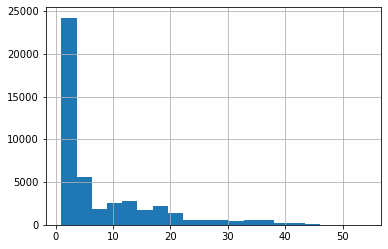

In [44]:
data.groupby('Customer_ID')['Transaction_ID'].agg('count').describe(), data.groupby('Customer_ID')['Transaction_ID'].agg('count').hist(bins=20)

### Date_of_Travel 

In [45]:
data['Date_of_Travel'].describe(datetime_is_numeric=True)

count                           359392
mean     2017-08-17 01:37:55.042460416
min                2016-01-02 00:00:00
25%                2016-11-23 00:00:00
50%                2017-09-10 00:00:00
75%                2018-05-12 00:00:00
max                2018-12-31 00:00:00
Name: Date_of_Travel, dtype: object

(Friday       81402
 Saturday     78234
 Sunday       70310
 Thursday     39747
 Wednesday    30102
 Tuesday      29860
 Monday       29737
 Name: Date_of_Travel, dtype: int64,
 <AxesSubplot:>)

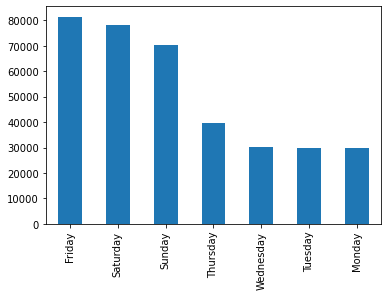

In [46]:
# Distribution of Transaction by day

data['Date_of_Travel'].dt.day_name().value_counts() ,data['Date_of_Travel'].dt.day_name().value_counts().plot(kind='bar')

### Company

In [47]:
data['Company'].describe()

count         359392
unique             2
top       Yellow Cab
freq          274681
Name: Company, dtype: object

### Payment_Mode

(Payment_Mode
 Card    215504
 Cash    143888
 Name: Payment_Mode, dtype: int64,
 <AxesSubplot:xlabel='Payment_Mode'>)

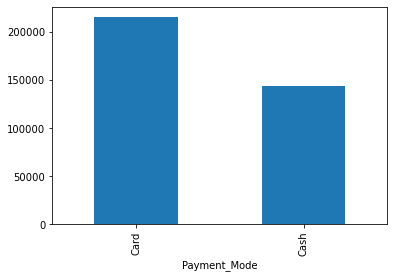

In [48]:
data.groupby('Payment_Mode')['Payment_Mode'].count(),data.groupby('Payment_Mode')['Payment_Mode'].count().plot(kind='bar')

### Gender

(Gender
 Female    153480
 Male      205912
 Name: Gender, dtype: int64,
 <AxesSubplot:xlabel='Gender'>)

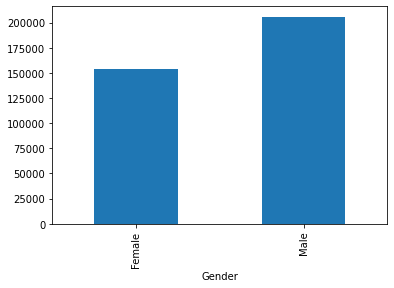

In [49]:
data.groupby('Gender')['Gender'].count(), data.groupby('Gender')['Gender'].count().plot(kind='bar')

### Age

In [50]:
data['Age'].describe()

count    359392.000000
mean         35.336705
std          12.594234
min          18.000000
25%          25.000000
50%          33.000000
75%          42.000000
max          65.000000
Name: Age, dtype: float64

<AxesSubplot:>

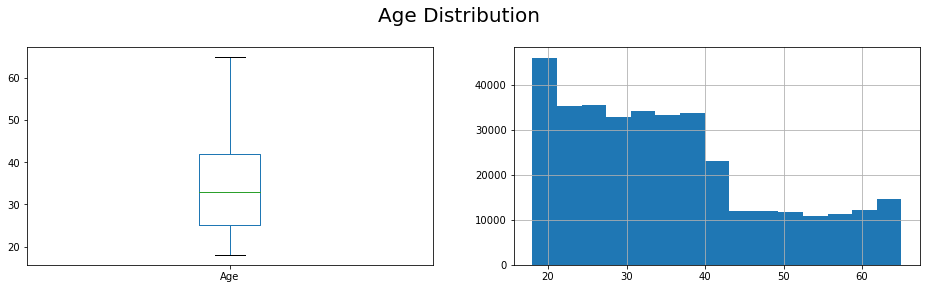

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
fig.suptitle('Age Distribution', size=20 , y=1.02)
data['Age'].plot.box(ax=ax1)
data['Age'].hist(ax=ax2, bins=15)

### Income_Month

In [52]:
data['Income_Month'].describe()

count    359392.000000
mean      15048.822937
std        7969.409482
min        2000.000000
25%        8424.000000
50%       14685.000000
75%       21035.000000
max       35000.000000
Name: Income_Month, dtype: float64

<AxesSubplot:>

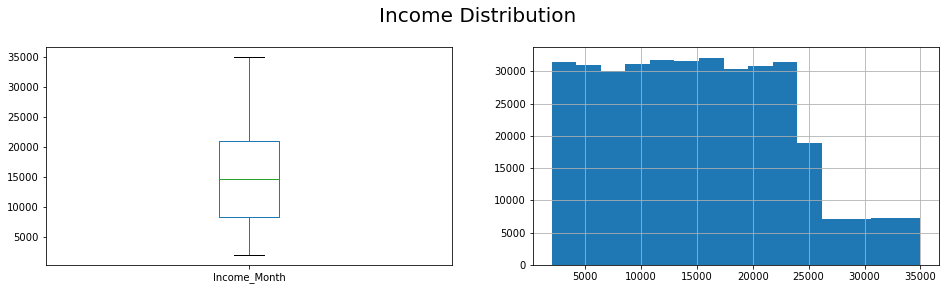

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
fig.suptitle('Income Distribution', size=20 , y=1.02)
data['Income_Month'].plot.box(ax=ax1)
data['Income_Month'].hist(ax=ax2, bins=15)

### profit_pkm

In [54]:
data['profit_pkm'].describe()

count    359392.000000
mean          6.083579
std           5.543493
min          -4.998235
25%           2.000385
50%           4.466809
75%           9.170006
max          41.115556
Name: profit_pkm, dtype: float64

<AxesSubplot:>

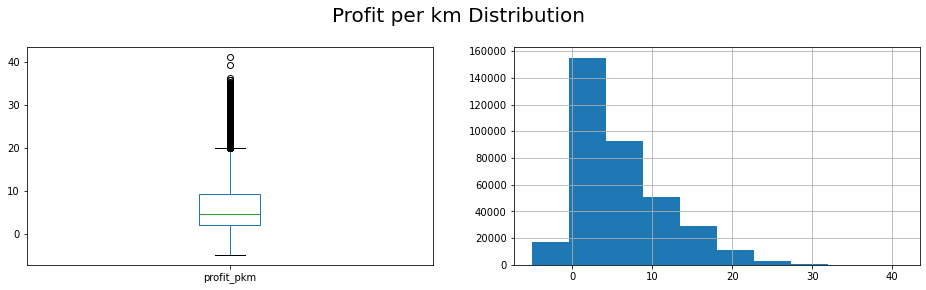

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
fig.suptitle('Profit per km Distribution', size=20 , y=1.02)
data['profit_pkm'].plot.box(ax=ax1)
data['profit_pkm'].hist(ax=ax2)

## Multivariate analysis

### Transactions

1. Count of transactions by company
2. Count of transactions by company and year
3. Count of transaction by company and month
4. Count of transactions by company and day

In [56]:
data.groupby('Company')['Transaction_ID'].count()

Company
Pink Cab       84711
Yellow Cab    274681
Name: Transaction_ID, dtype: int64

In [90]:
tran_company = data.groupby('Company')['Transaction_ID'].count()
tran_company

Company
Pink Cab       84711
Yellow Cab    274681
Name: Transaction_ID, dtype: int64

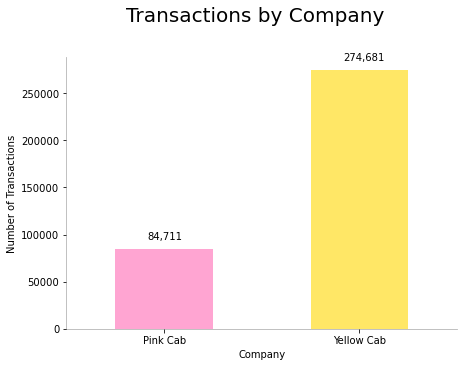

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(16,4))
fig.suptitle('Transactions by Company', size=20, y=1.02)
color1 = ['hotpink','gold']
tran_companyplot =tran_company.plot.bar(color=color1, ax=ax, figsize=(7,5), width=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_alpha(0.3)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_alpha(0.3)
ax.set_ylabel('Number of Transactions')
##ax.patches[0].set_alpha(0.5) ; it is included in the loop
##ax.patches[1].set_alpha(0.5)
for p in ax.patches:
    ax.annotate(text = str(f'{p.get_height():,}'), xy =(p.get_x()+(p.get_width()*0.333), p.get_height()+ 1e4))
    p.set_alpha(0.6)

In [59]:
data_sort = data.set_index('Date_of_Travel').sort_index()
data_sort.head(3)

,Transaction_ID,Customer_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Gender,Age,Income_Month,cost_higher_than_price,profit,profit_pkm
Date_of_Travel,,,,,,,,,,,,,,
2016-01-02,10001340,52536,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,Card,Male,24,10606,False,66.6760,6.536863
2016-01-02,10000640,4844,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,Cash,Male,32,5548,False,164.9960,10.576667
2016-01-02,10000635,5671,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,Cash,Male,24,7081,False,195.7548,7.805215


In [60]:
tran_year = data.groupby([data['Date_of_Travel'].dt.year.rename('year'), data['Company']])['Transaction_ID'].count().to_frame()
tran_year

Transaction_ID
year Company                   
2016 Pink Cab             25080
     Yellow Cab           82239
2017 Pink Cab             30321
     Yellow Cab           98189
2018 Pink Cab             29310
     Yellow Cab           94253

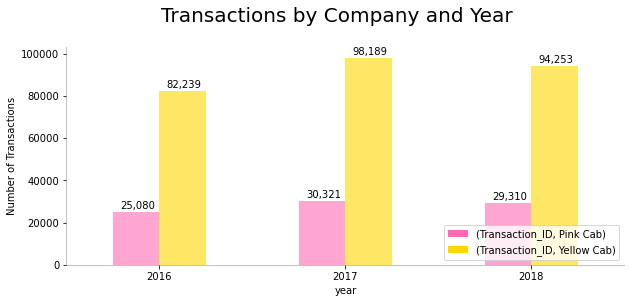

In [61]:
fig2, ax2 = plt.subplots(1, 1, figsize=(10,4))
fig2.suptitle('Transactions by Company and Year', size=20, y=1.02)


tran_year.unstack().plot.bar(color= ['hotpink','gold'] ,ax=ax2)



# Rotate x labels
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

# set format to spines
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_alpha(0.3)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_alpha(0.3)

# y axis label
ax2.set_ylabel('Number of Transactions')

# locating legend box
ax2.legend(loc='lower right')

# values labels and alpha to bars
for p in ax2.patches:
    ax2.annotate(text = str(f'{p.get_height():,}'), xy =(p.get_x()+(p.get_width()*0.15), p.get_height() + 1500))
    p.set_alpha(0.6)


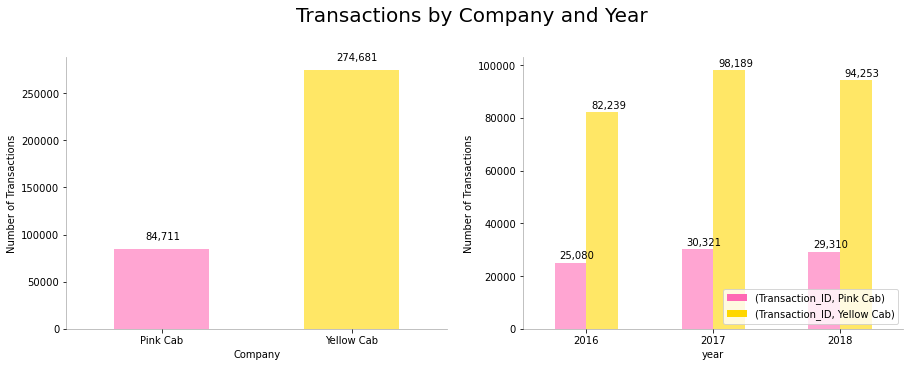

In [62]:
# lests put both graphs together

fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Transactions by Company and Year', size=20, y=1.02)

#first graph
color1 = ['hotpink','gold']
tran_companyplot =tran_company.plot.bar(color=color1, ax=ax1, width=0.5)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_alpha(0.3)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_alpha(0.3)
ax1.set_ylabel('Number of Transactions')
##ax.patches[0].set_alpha(0.5) ; it is included in the loop
##ax.patches[1].set_alpha(0.5)
for p in ax1.patches:
    ax1.annotate(text = str(f'{p.get_height():,}'), xy =(p.get_x()+(p.get_width()*0.333), p.get_height()+ 1e4))
    p.set_alpha(0.6)
    
    
#second graph
tran_year.unstack().plot.bar(color= ['hotpink','gold'], ax=ax2)

# Rotate x labels
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

# set format to spines
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_alpha(0.3)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_alpha(0.3)

# y axis label
ax2.set_ylabel('Number of Transactions')

# locating legend box
ax2.legend(loc='lower right')

# values labels and alpha to bars
for p in ax2.patches:
    ax2.annotate(text = str(f'{p.get_height():,}'), xy =(p.get_x()+(p.get_width()*0.15), p.get_height() + 1500))
    p.set_alpha(0.6)

[Text(0, 0, 'Pink Cab'), Text(1, 0, 'Yellow Cab')]

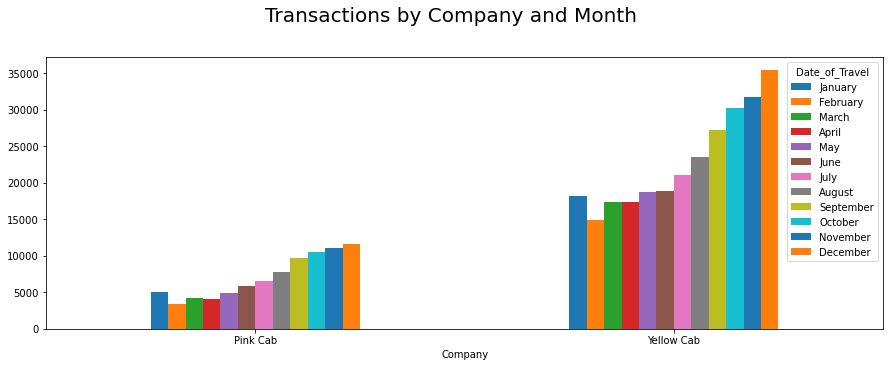

In [63]:
# Transactions by company and by month

Tran_month = data.groupby([data['Company'],data['Date_of_Travel'].dt.month_name()]).size()
Tran_month_u = Tran_month.unstack()
Tran_month_u = Tran_month_u[['January','February','March','April','May','June','July','August','September','October','November','December']]

fig3, ax3 = plt.subplots(1, 1, figsize=(15,5))
fig3.suptitle('Transactions by Company and Month', size=20, y=1.02)
Tran_month_u.plot.bar(ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)

[Text(0, 0, '(Pink Cab, 2016)'),
 Text(1, 0, '(Pink Cab, 2017)'),
 Text(2, 0, '(Pink Cab, 2018)'),
 Text(3, 0, '(Yellow Cab, 2016)'),
 Text(4, 0, '(Yellow Cab, 2017)'),
 Text(5, 0, '(Yellow Cab, 2018)')]

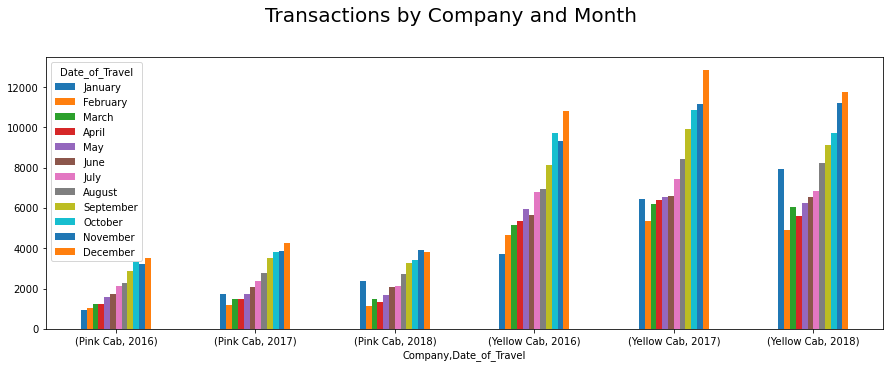

In [64]:
# Transactions by company and by month and year

Tran_year_month = data.groupby([data['Company'], data['Date_of_Travel'].dt.year,data['Date_of_Travel'].dt.month_name()]).size()
Tran_year_month_u = Tran_year_month.unstack()
Tran_year_month_u = Tran_year_month_u[['January','February','March','April','May','June','July','August','September','October','November','December']]

fig5, ax5 = plt.subplots(1, 1, figsize=(15,5))
fig5.suptitle('Transactions by Company and Month', size=20, y=1.02)
Tran_year_month_u.plot.bar(ax=ax5)
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=0)

[Text(0, 0, 'Pink Cab'), Text(1, 0, 'Yellow Cab')]

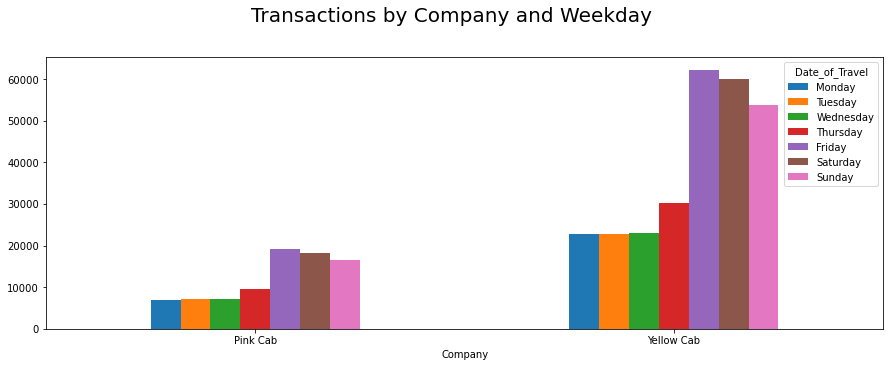

In [65]:
# Transaction by company and day of the week

Tran_day = data.groupby([data['Company'],data['Date_of_Travel'].dt.day_name()]).size()
Tran_day_u = Tran_day.unstack()

#reordering of weekday columns
Tran_day_u = Tran_day_u[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

fig4, ax4 = plt.subplots(1, 1, figsize=(15,5))
fig4.suptitle('Transactions by Company and Weekday', size=20, y=1.02)
Tran_day_u.plot.bar(ax=ax4)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0)

### Profit

1. Sum of profit by company *
2. Average profit by km by company
3. Average profit per trip by company
4. Average profit per km by company and by city
5. Average profit by year and by company

###  Customer

1. Customer base by age and company
4. Customer reach by city

In [66]:
# Profit by company

# number of transactions

(co1t, co2t) = data[[ 'Company', 'Transaction_ID']].groupby('Company').size().index
(t_co1, t_co2) = data[[ 'Company', 'Transaction_ID']].groupby('Company').size()


# Profit

(co1, co2) = data[[ 'Company', 'profit']].groupby('Company').agg('sum')['profit'].index
(p_co1, p_co2) = data[[ 'Company', 'profit']].groupby('Company').agg('sum')['profit']

# Average profit per transaction

print(f'{"Company":^12}|{"Transactions":^15}|{"Total Profit":^15}|{"Profit/Transaction":^25}')
print('-' * 68)
print(f'{co1:<12}|{t_co1:>15,.2f}|{p_co1:>15,.2f}|{p_co1/t_co1:>15,.2f}')
print(f'{co2:<12}|{t_co2:>15,.2f}|{p_co2:>15,.2f}|{p_co2/t_co2:>15,.2f}')

  Company   | Transactions  | Total Profit  |   Profit/Transaction    
--------------------------------------------------------------------
Pink Cab    |      84,711.00|   5,307,328.32|          62.65
Yellow Cab  |     274,681.00|  44,020,373.17|         160.26


<ipython-input-94-3879b9eb6a42>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_yticklabels(ax5.get_yticklabels(), rotation=0)


[Text(0, 0.0, '0'),
 Text(0, 10000000.0, '10,000,000'),
 Text(0, 20000000.0, '20,000,000'),
 Text(0, 30000000.0, '30,000,000'),
 Text(0, 40000000.0, '40,000,000'),
 Text(0, 50000000.0, '50,000,000')]

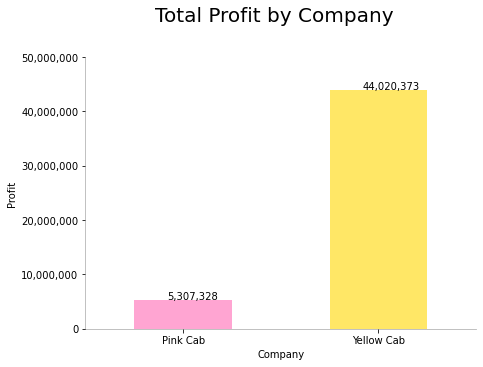

In [94]:
# graph
fig5, ax5  = plt.subplots(1, 1, figsize=(7,5))
fig5.suptitle('Total Profit by Company', size=20, y=1.02)

color5 = ['hotpink','gold']
data[[ 'Company', 'profit']].groupby('Company').agg('sum')['profit'].plot.bar(color=color5, ax=ax5, width=0.5)

ax5.set_xticklabels(ax5.get_xticklabels(), rotation=0)
ax5.set_yticklabels(ax5.get_yticklabels(), rotation=0)
ax5.spines['top'].set_visible(False)
ax5.spines['left'].set_alpha(0.3)
ax5.spines['right'].set_visible(False)
ax5.spines['bottom'].set_alpha(0.3)
ax5.set_ylabel('Profit')
##ax.patches[0].set_alpha(0.5) ; it is included in the loop
##ax.patches[1].set_alpha(0.5)
for p in ax5.patches:
    ax5.annotate(text = str(f'{p.get_height():,.0f}'), xy =(p.get_x()+(p.get_width()*0.333), p.get_height()+ 1e4))
    p.set_alpha(0.6)
    
# fixing yticks with "set_yticks"
label_format = '{:,.0f}'
ticks_loc = ax5.get_yticks().tolist()
ax5.set_yticks(ax5.get_yticks().tolist())
ax5.set_yticklabels([label_format.format(x) for x in ticks_loc])

[Company     Pink Cab    Yellow Cab
 year                              
 2016     1713511.224  1.392700e+07
 2017     2033654.908  1.657598e+07
 2018     1560162.189  1.351740e+07,
 <AxesSubplot:xlabel='year'>]

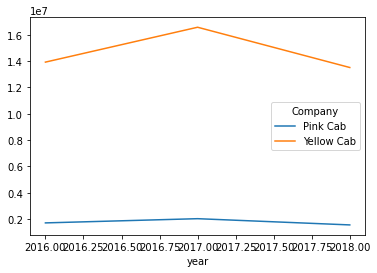

In [116]:
[data[[ 'Company', 'profit']].groupby(['Company', data['Date_of_Travel'].dt.year.rename('year')]).agg('sum')['profit'].unstack().T,
data[[ 'Company', 'profit']].groupby(['Company', data['Date_of_Travel'].dt.year.rename('year')]).agg('sum')['profit'].unstack().T.plot()]

## Market share

In [118]:
data.head(3)

,Transaction_ID,Customer_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Gender,Age,Income_Month,cost_higher_than_price,profit,profit_pkm
0,10000011,29290,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Card,Male,28,10813,False,57.315,1.882266
1,10000012,27703,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Card,Male,27,9237,False,23.666,0.826904
2,10000013,28712,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Cash,Male,53,11242,False,27.568,3.049558


In [157]:
left1 = data[[ 'Company', 'Customer_ID','City']].groupby(['Company', 'City']).nunique()
right1 = city.set_index('City')

Data_city = left1.join(right1)

# Lets create a new variable to know the Users coverage of each company in each city

Data_city['users_coverage'] = Data_city['Customer_ID']/Data_city['Users']
Data_city

Customer_ID  Population   Users  users_coverage
Company    City                                                           
Pink Cab   ATLANTA GA             1322      814885   24701        0.053520
           AUSTIN TX              1354      698371   14978        0.090399
           BOSTON MA              2463      248968   80021        0.030779
           CHICAGO IL             2859     1955130  164468        0.017383
           DALLAS TX              1118      942908   22157        0.050458
           DENVER CO              1145      754233   12421        0.092183
           LOS ANGELES CA         2996     1595037  144132        0.020787
           MIAMI FL               1480     1339155   17675        0.083734
           NASHVILLE TN           1356      327225    9270        0.146278
           NEW YORK NY            2972     8405837  302149        0.009836
           ORANGE COUNTY          1198     1030185   12994        0.092196
           PHOENIX AZ              763      943999    6133        0.124409
           PITTSBURGH PA           604      542085    3643        0.165797
           SACRAMENTO CA          1078      545776    7044        0.153038
           SAN DIEGO CA           2909      959307   69995        0.041560
           SEATTLE WA             1790      671238   25063        0.071420
           SILICON VALLEY         2130     1177609   27247        0.078174
           TUCSON AZ               684      631442    5712        0.119748
           WASHINGTON DC          2109      418859  127001        0.016606
Yellow Cab ATLANTA GA             2595      814885   24701        0.105056
           AUSTIN TX              1914      698371   14978        0.127787
           BOSTON MA              2997      248968   80021        0.037453
           CHICAGO IL             3000     1955130  164468        0.018241
           DALLAS TX              2564      942908   22157        0.115720
           DENVER CO              1681      754233   12421        0.135335
           LOS ANGELES CA         2998     1595037  144132        0.020800
           MIAMI FL               2334     1339155   17675        0.132051
           NASHVILLE TN            965      327225    9270        0.104099
           NEW YORK NY            3000     8405837  302149        0.009929
           ORANGE COUNTY          1712     1030185   12994        0.131753
           PHOENIX AZ              994      943999    6133        0.162074
           PITTSBURGH PA           574      542085    3643        0.157562
           SACRAMENTO CA           880      545776    7044        0.124929
           SAN DIEGO CA           2886      959307   69995        0.041232
           SEATTLE WA             2486      671238   25063        0.099190
           SILICON VALLEY         2382     1177609   27247        0.087422
           TUCSON AZ               934      631442    5712        0.163515
           WASHINGTON DC          3000      418859  127001        0.023622

(Company         Pink Cab  Yellow Cab
 City                                
 ATLANTA GA      0.053520    0.105056
 AUSTIN TX       0.090399    0.127787
 BOSTON MA       0.030779    0.037453
 CHICAGO IL      0.017383    0.018241
 DALLAS TX       0.050458    0.115720
 DENVER CO       0.092183    0.135335
 LOS ANGELES CA  0.020787    0.020800
 MIAMI FL        0.083734    0.132051
 NASHVILLE TN    0.146278    0.104099
 NEW YORK NY     0.009836    0.009929
 ORANGE COUNTY   0.092196    0.131753
 PHOENIX AZ      0.124409    0.162074
 PITTSBURGH PA   0.165797    0.157562
 SACRAMENTO CA   0.153038    0.124929
 SAN DIEGO CA    0.041560    0.041232
 SEATTLE WA      0.071420    0.099190
 SILICON VALLEY  0.078174    0.087422
 TUCSON AZ       0.119748    0.163515
 WASHINGTON DC   0.016606    0.023622,
 <AxesSubplot:xlabel='City'>)

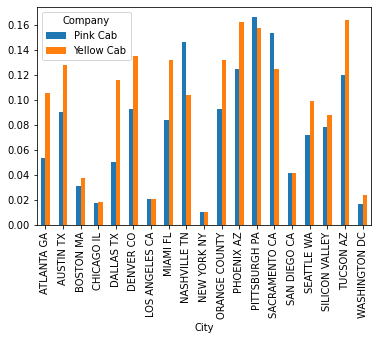

In [155]:
Data_city.unstack().T.loc['users_coverage',], Data_city.unstack().T.loc['users_coverage',].plot(kind='bar')

## Conclusions

- Both companies have similar customer caracteristics (gender distributions, age distribution, income distribution, preference by month and day of week).
- Yellow Cab Company have more customers than Pink Company.
- Yellow Cab Company generate more profit than Pink Company.
- Yellow Cab Company have more customer reach than Pink Company in the almost all the cities where there is presence of both companies.
- Pink Cab Company have more customer reach then Yellow Company in Nashville,  Sacramento, San Diego and Pittsburgh, but in half of those just by an small difference.
